In [1]:
import torch
import pandas as pd
import random
import seaborn as sns
from compare import getExampleSentencesBySense
import matplotlib.pyplot as plt
import json
from experiment import train_lemma_classifiers_with_vec
from bert import generate_vectorization
from vectrain import *
from lemmas import *

using gpu


In [2]:
%matplotlib inline
sns.set(rc={'figure.figsize':(16,10)})

In [3]:
#Prepare Data for Bert Graphs
data_file = "all_lemmas_20-max_layer_0.csv"
df = pd.read_csv(data_file)
freq_dict = create_sense_freq_dict()
def get_freq(sense):
    return freq_dict[sense]
df = pd.concat([df, df["sense1"].apply(get_freq).rename("sense1_freq")], axis=1)
df = pd.concat([df, df["sense2"].apply(get_freq).rename("sense2_freq")], axis=1)
df = df.sort_values(by="best_avg_acc")

In [4]:
df

,spec,lemma,best_avg_acc,sense1,sense2,pos1,pos2,max_samp,sense1_freq,sense2_freq
146,[0],have,0.5164,/dictionary/sense/en_us_NOAD3e_2012/m_en_us125...,/dictionary/sense/en_us_NOAD3e_2012/m_en_us125...,VERB,VERB,1000,2516,1792
52,[0],take,0.5166,/dictionary/sense/en_us_NOAD3e_2012/m_en_us129...,/dictionary/sense/en_us_NOAD3e_2012/m_en_us129...,VERB,VERB,1000,215,210
40,[0],how,0.5176,/dictionary/sense/en_us_NOAD3e_2012/m_en_us125...,/dictionary/sense/en_us_NOAD3e_2012/m_en_us125...,ADV,ADV,1000,258,160
260,[0],be,0.5187,/dictionary/sense/en_us_NOAD3e_2012/m_en_us122...,/dictionary/sense/en_us_NOAD3e_2012/m_en_us122...,VERB,VERB,1000,19555,1180
307,[0],make,0.5189,/dictionary/sense/en_us_NOAD3e_2012/m_en_us126...,/dictionary/sense/en_us_NOAD3e_2012/m_en_us126...,VERB,VERB,1000,1646,226
291,[0],feel,0.5195,/dictionary/sense/en_us_NOAD3e_2012/m_en_us124...,/dictionary/sense/en_us_NOAD3e_2012/m_en_us124...,VERB,VERB,1000,283,163
133,[0],last,0.5213,/dictionary/sense/en_us_NOAD3e_2012/m_en_us126...,/dictionary/sense/en_us_NOAD3e_2012/m_en_us126...,ADJ,ADJ,1000,261,105
245,[0],too,0.5213,/dictionary/sense/en_us_NOAD3e_2012/m_en_us129...,/dictionary/sense/en_us_NOAD3e_2012/m_en_us129...,ADV,ADV,1000,297,205
222,[0],way,0.5215,/dictionary/sense/en_us_NOAD3e_2012/m_en_us130...,/dictionary/sense/en_us_NOAD3e_2012/m_en_us130...,NOUN,NOUN,1000,491,154
253,[0],more,0.5216,/dictionary/sense/en_us_NOAD3e_2012/m_en_us126...,/dictionary/sense/en_us_NOAD3e_2012/m_en_us126...,ADV,ADV,1000,389,111


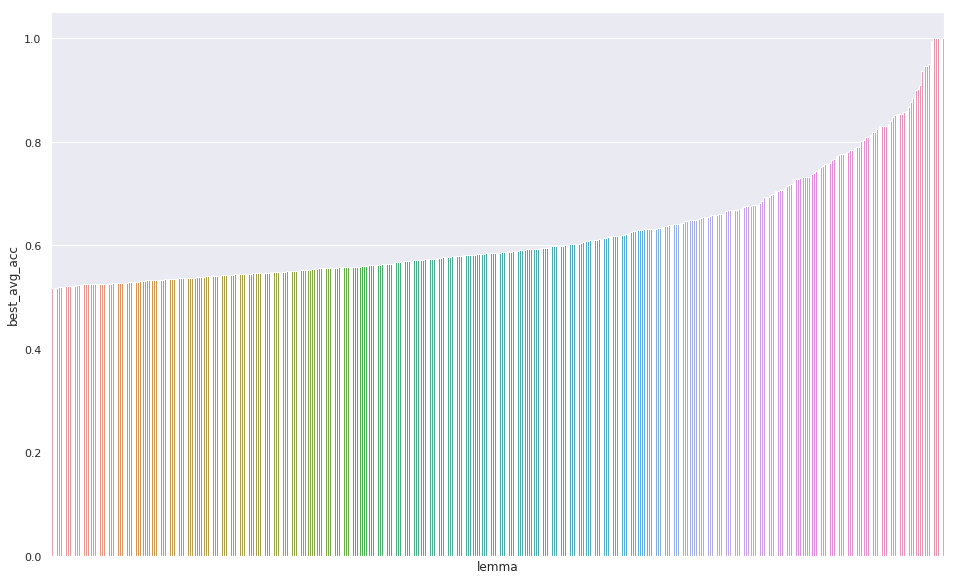

In [5]:
all_lemmas = df
plt.xticks(rotation=45)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    labelbottom=False)
all_lemmas_graph = sns.barplot(x="lemma", y="best_avg_acc", data=all_lemmas)

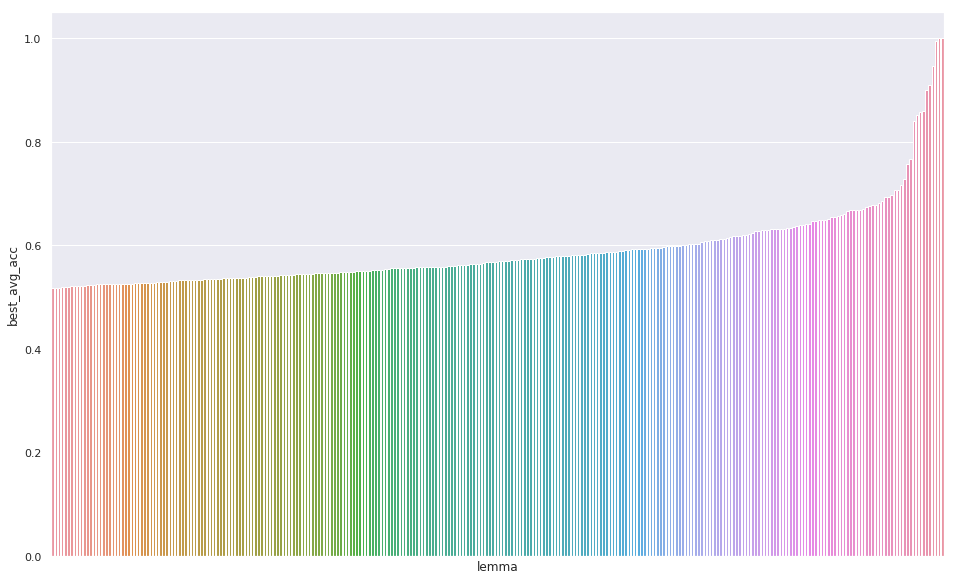

In [6]:
same_pos = df[df["pos1"] == df["pos2"]]
plt.xticks(rotation=45)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    labelbottom=False)
same_pos_graph = sns.barplot(x="lemma", y="best_avg_acc", data=same_pos)

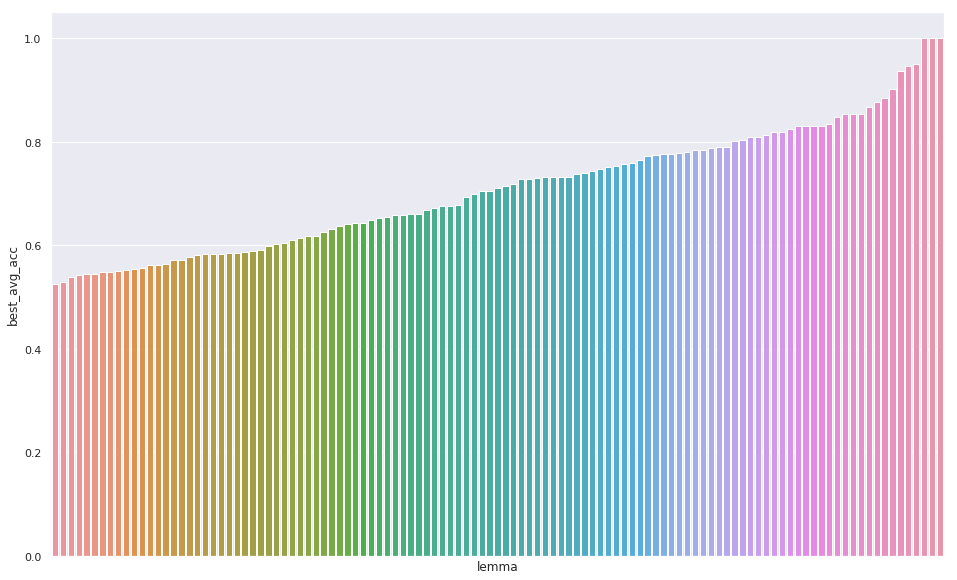

In [7]:
diff_pos = df[df["pos1"] != df["pos2"]]
plt.xticks(rotation=45)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    labelbottom=False)
diff_pos_graph = specs = sns.barplot(x="lemma", y="best_avg_acc", data=diff_pos)

In [33]:


with open("data/sense_to_pofs_dict.json") as f:
    sense_pos_dict = json.load(f)
        
def get_pair_type(row):
    sense1_pos = sense_pos_dict[row[3]]
    sense2_pos = sense_pos_dict[row[4]]
    if sense1_pos > sense2_pos:
        sense1_pos, sense2_pos = sense2_pos, sense1_pos
    return sense1_pos+", "+sense2_pos

In [34]:
tmp = df.apply(get_pair_type, axis=1).rename("pos_combo")

df_with_pos_combo = pd.concat([df, tmp], axis=1)
df_with_pos_combo

,spec,lemma,best_avg_acc,sense1,sense2,pos1,pos2,max_samp,sense1_freq,sense2_freq,pos_combo
146,[0],have,0.5164,/dictionary/sense/en_us_NOAD3e_2012/m_en_us125...,/dictionary/sense/en_us_NOAD3e_2012/m_en_us125...,VERB,VERB,1000,2516,1792,"VERB, VERB"
52,[0],take,0.5166,/dictionary/sense/en_us_NOAD3e_2012/m_en_us129...,/dictionary/sense/en_us_NOAD3e_2012/m_en_us129...,VERB,VERB,1000,215,210,"VERB, VERB"
40,[0],how,0.5176,/dictionary/sense/en_us_NOAD3e_2012/m_en_us125...,/dictionary/sense/en_us_NOAD3e_2012/m_en_us125...,ADV,ADV,1000,258,160,"ADV, ADV"
260,[0],be,0.5187,/dictionary/sense/en_us_NOAD3e_2012/m_en_us122...,/dictionary/sense/en_us_NOAD3e_2012/m_en_us122...,VERB,VERB,1000,19555,1180,"VERB, VERB"
307,[0],make,0.5189,/dictionary/sense/en_us_NOAD3e_2012/m_en_us126...,/dictionary/sense/en_us_NOAD3e_2012/m_en_us126...,VERB,VERB,1000,1646,226,"VERB, VERB"
291,[0],feel,0.5195,/dictionary/sense/en_us_NOAD3e_2012/m_en_us124...,/dictionary/sense/en_us_NOAD3e_2012/m_en_us124...,VERB,VERB,1000,283,163,"VERB, VERB"
133,[0],last,0.5213,/dictionary/sense/en_us_NOAD3e_2012/m_en_us126...,/dictionary/sense/en_us_NOAD3e_2012/m_en_us126...,ADJ,ADJ,1000,261,105,"ADJ, ADJ"
245,[0],too,0.5213,/dictionary/sense/en_us_NOAD3e_2012/m_en_us129...,/dictionary/sense/en_us_NOAD3e_2012/m_en_us129...,ADV,ADV,1000,297,205,"ADV, ADV"
222,[0],way,0.5215,/dictionary/sense/en_us_NOAD3e_2012/m_en_us130...,/dictionary/sense/en_us_NOAD3e_2012/m_en_us130...,NOUN,NOUN,1000,491,154,"NOUN, NOUN"
253,[0],more,0.5216,/dictionary/sense/en_us_NOAD3e_2012/m_en_us126...,/dictionary/sense/en_us_NOAD3e_2012/m_en_us126...,ADV,ADV,1000,389,111,"ADV, ADV"


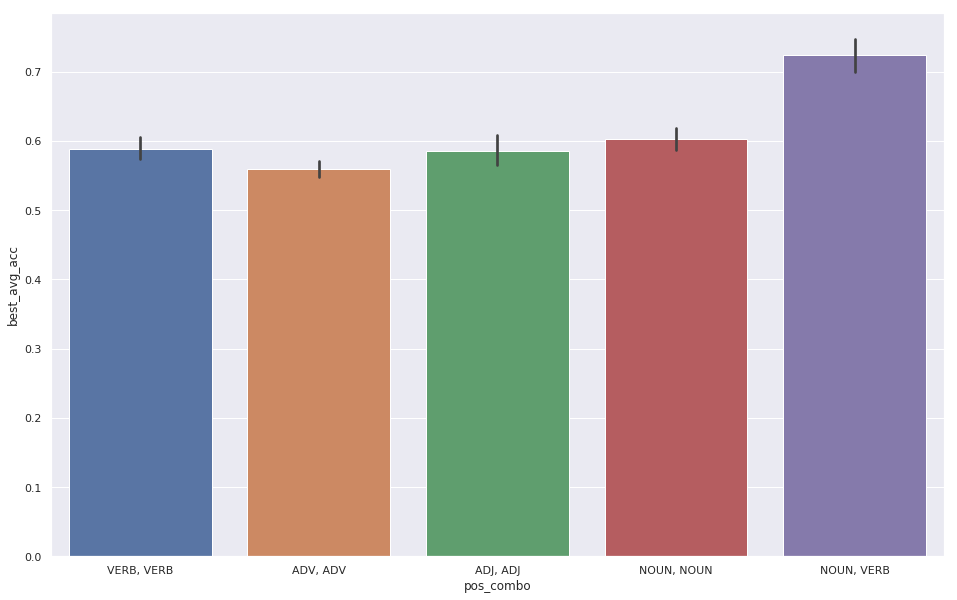

In [36]:
#Remove columns with only one occurance
df_with_pos_combo = df_with_pos_combo[df_with_pos_combo["pos_combo"].isin(["VERB, VERB","ADJ, ADJ",
"ADV, ADV","NOUN, NOUN", "NOUN, VERB"])]
df_with_pos_combo
diff_pos_graph = sns.barplot(x="pos_combo", y="best_avg_acc", data=df_with_pos_combo)

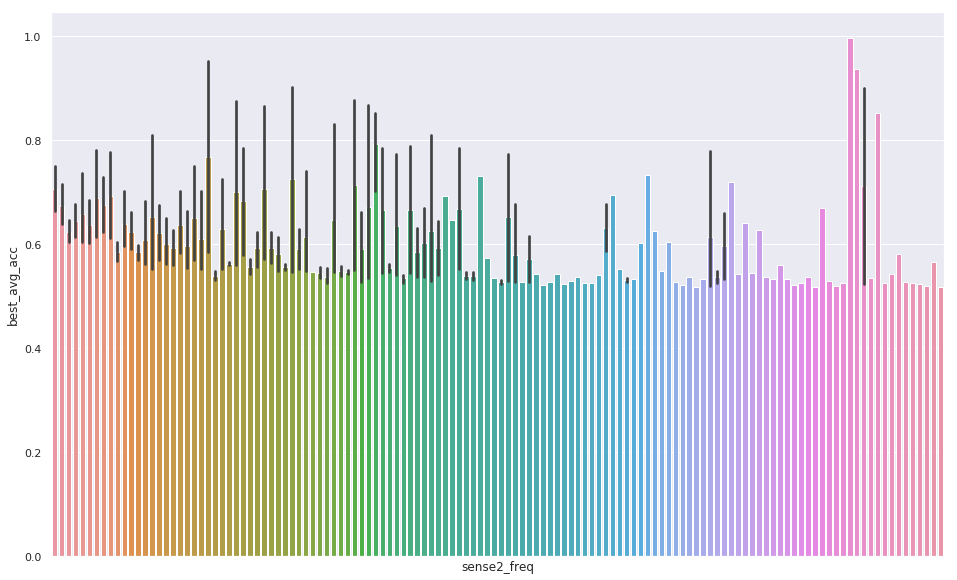

In [11]:
max_samp_data = df
plt.xticks(rotation=45)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    labelbottom=False)
max_samp_graph = sns.barplot(x="sense2_freq", y="best_avg_acc", data=max_samp_data)

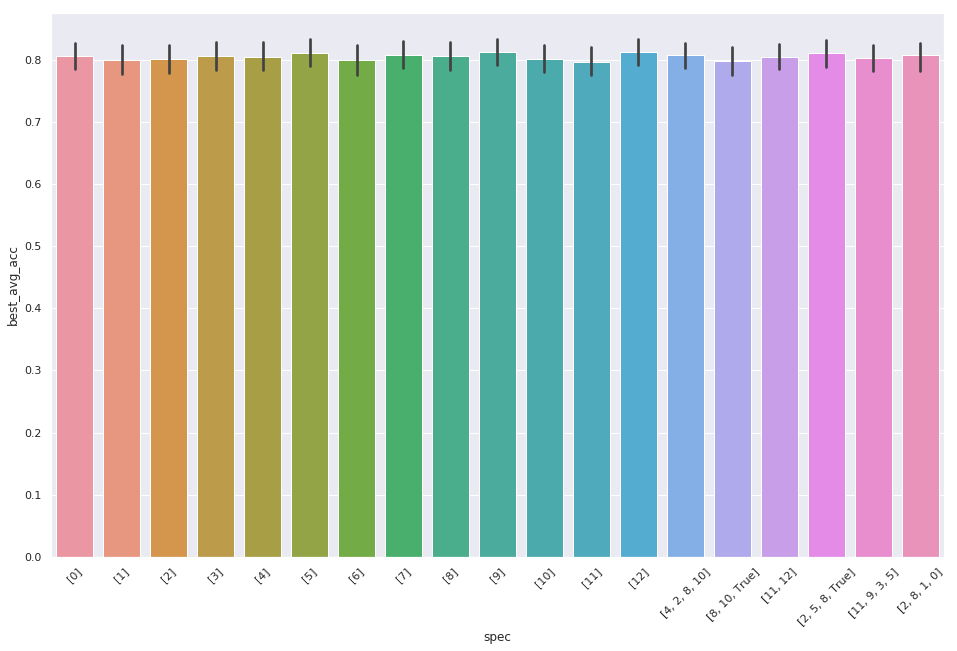

In [12]:
spec_data = pd.read_csv("classifier_data_spec8.csv")

#Note: this is based off of a subset of the words
specs = sns.barplot(x="spec", y="best_avg_acc", data=spec_data)
plt.xticks(rotation=45)
plt.show()

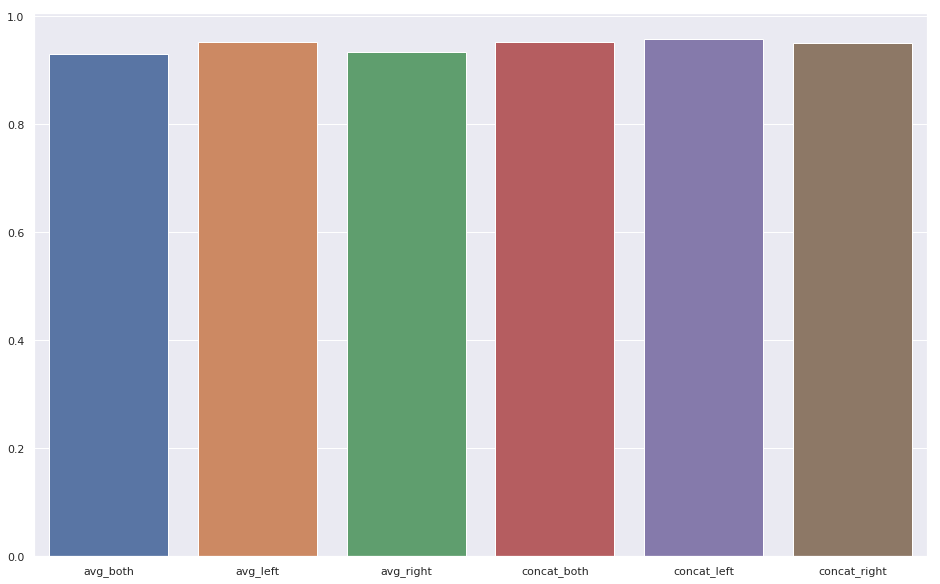

In [13]:
with open("neighbor_test_result.json", "r") as f:
    neighbors_data = json.load(f)
neighbors_data_graph =  sns.barplot(x=list(neighbors_data.keys()), y=list(neighbors_data.values()))

In [14]:
#Elmo goes below here.
elmo_file = ""
elmo_df = pd.read_csv()
elmo_df = pd.concat([elmo_df, elmo_df["sense1"].apply(get_freq).rename("sense1_freq")], axis=1)
elmo_df = pd.concat([elmo_df, elmo_df["sense2"].apply(get_freq).rename("sense2_freq")], axis=1)
elmo_df = elmo_df.sort_values(by="best_avg_acc")

TypeError: parser_f() missing 1 required positional argument: 'filepath_or_buffer'

In [ ]:
elmo_df

In [ ]:
elmo_all_lemmas = elmo_df
plt.xticks(rotation=45)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    labelbottom=False)
elmo_all_lemmas_graph = sns.barplot(x="lemma", y="best_avg_acc", data=elmo_all_lemmas)

In [ ]:
elmo_same_pos = elmo_df[elmo_df["pos1"] == elmo_df["pos2"]]
plt.xticks(rotation=45)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    labelbottom=False)
elmo_same_pos_graph = sns.barplot(x="lemma", y="best_avg_acc", data=elmo_same_pos)

In [ ]:
elmo_diff_pos = elmo_df[elmo_df["pos1"] != elmo_df["pos2"]]
plt.xticks(rotation=45)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    labelbottom=False)
elmo_diff_pos_graph = sns.barplot(x="lemma", y="best_avg_acc", data=elmo_diff_pos)

In [ ]:


with open("data/sense_to_pofs_dict.json") as f:
    sense_pos_dict = json.load(f)
        
def get_pair_type(row):
    sense1_pos = sense_pos_dict[row[3]]
    sense2_pos = sense_pos_dict[row[4]]
    if sense1_pos > sense2_pos:
        sense1_pos, sense2_pos = sense2_pos, sense1_pos
    return sense1_pos, sense2_pos

In [ ]:
tmp = df.apply(get_pair_type, axis=1).rename("pos_combo")

elmo_df_with_pos_combo = pd.concat([elmo_df, tmp], axis=1)
elmo_df_with_pos_combo

In [ ]:
#Note: many of the pos_combos have very few datapoints, in fact several have just one
plt.xticks(rotation=45)
elmo_diff_pos_graph = specs = sns.barplot(x="pos_combo", y="best_avg_acc", data=elmo_df_with_pos_combo)

In [ ]:
elmo_max_samp_data = elmo_df
plt.xticks(rotation=45)
elmo_max_samp_graph = sns.barplot(x="sense2_freq", y="best_avg_acc", data=elmo_max_samp_data)

In [ ]:
elmo_spec_data_file
elmo_spec_data = pd.read_csv(elmo_spec_data_file)

#Note: this is based off of a subset of the words
elmo_specs_graph = sns.barplot(x="spec", y="best_avg_acc", data=elmo_spec_data)
plt.xticks(rotation=45)
plt.show()

In [ ]:
with open("elmo_neighbor_test_result.json", "r") as f:
    neighbors_data = json.load(f)
neighbors_data_graph =  sns.barplot(x=list(neighbors_data.keys()), y=list(neighbors_data.values()))